# Mise en oeuvre Scipy 

## Résolution EDO 

Considérons un circuit RC classique définit par l'équation différentielle suivante : 

$$ RC \frac{du}{dt} + u = u_e $$ 

$$ \frac{du}{dt} = \frac{u_e - u }{RC} $$


Avec $R=1000\Omega$, $C=10^{-6}F$ et $u(t=0) = 0$. 

**Question 1:** 

Dans le cas où $u_e(t) = U_0$ avec $U_0=10\,V$ calculer la solution de l'équation différentielle sur l'intervalle $[0, 0.005]$.

**Question 2:** 

Dans le cas où $u_e(t) = U_0 \sin \left( 2\pi f t \right)$ avec $U_0=10\,V$ et $f=100\,Hz$ calculer la solution de l'équation différentielle sur l'intervalle $[0, 5/f]$.

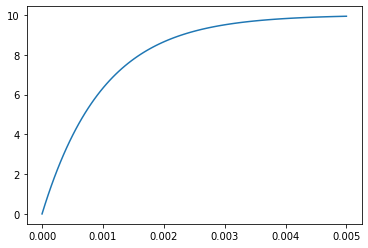

In [2]:
###### Solution de la question 1
import numpy as np 
import scipy.integrate
import matplotlib.pyplot as plt 
R=1000.
C=1e-6
u0 = 10 

def du_dt(X, t, r, c, ue):
    u = X[0]
    return (ue - u)/(r*c)

times = np.linspace(0,0.005, 100)
u_init = np.array([0.])
sol = scipy.integrate.odeint(du_dt, u_init, times, args=(R,C,u0))

plt.plot(times, sol)
plt.show()

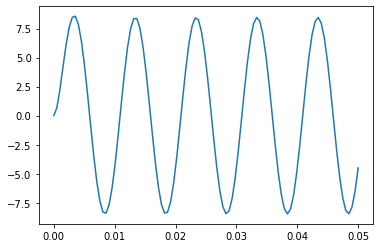

In [8]:
###### Solution de la question 2

def u_e(t, U0, f):
    return U0*np.sin(2*np.pi*f*t)

def dudt(X, t, r,c, ue, u0, f):
    u = X[0]
    return (ue(t, u0, f) - u)/(r*c)

times = np.linspace(0,0.05, 100)
u_init = np.array([0.])
sol = scipy.integrate.odeint(dudt, u_init, times, args=(R,C,u_e, 10., 100.))

plt.plot(times, sol)
plt.show()

## Résolution d'un système d'équation différentielle 

Considérons un circuit RLC classique définit par l'équation différentielle suivante : 

$$LC\frac{d^2u}{dt^2} + RC \frac{du}{dt} + u = u_e $$

**Question 1 :**

Transformer cette équation du second ordre en un système de deux équations du premier ordre. 


On pose $w=\dot{u}$. On a alors : 

$$ \mathbf{X} = [ u, w ] $$ 

Pour `odeint` il faut fournir l'expression de : 

$$ \frac{d X}{dt}  = \begin{cases} \dfrac{du}{dt} = w 
\\ \dfrac{dw}{dt} = 
\dfrac{u_e - u}{LC} - \dfrac{R}{L} w  \end{cases} $$



**Question 2 :**

Déterminer l'évolution de $u(t)$ sur l'intervalle $t \in [0, 0.02]$ pour $R=1000\,\Omega$, $F=10^{-6}\,F$. A vous de choisir la valeur de $L$ pour résoudre : (i) en régime pseudo-périodique ; (ii) apériodique ; (iii) critique. 

Pour rappel : 
$$q = \frac{1}{R} \sqrt{ \frac{L}{C} } \; ; \; \begin{cases} 
q = \dfrac{1}{2} & critique \\
q < \dfrac{1}{2} & aperiodiue \\ 
q > \dfrac{1}{2} & pseudo-periodique 
\end{cases}
$$

0.25
0.0025
1.0


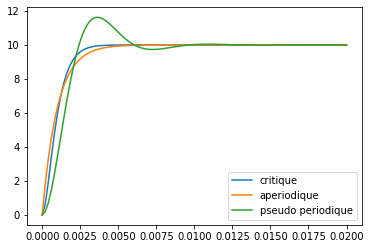

In [9]:
def dX_dt(X, t, R, L, C, ue):
    return np.array([X[1], (ue - X[0])/(L*C) - (R/L)*X[1]])

times = np.linspace(0,0.02,100)
x_init = np.array((0,0))
C = 1.e-6
R = 1000. 
L = C*(R**2/4.)
print(L)
sol_critique = scipy.integrate.odeint(dX_dt, x_init, times, args=(R, L, C, 10.))


L = C*(R**2/4.) * 0.01
print(L)
sol_aperiodique = scipy.integrate.odeint(dX_dt, x_init, times, args=(R, L, C, 10.))


L = C*(R**2/4.) * 4. 
print(L)
sol_pseudo = scipy.integrate.odeint(dX_dt, x_init, times, args=(R, L, C, 10.))

plt.plot(times, sol_critique[:,0], label="critique")
plt.plot(times, sol_aperiodique[:,0], label="aperiodique")
plt.plot(times, sol_pseudo[:,0], label="pseudo periodique")
plt.legend(loc="best")

Si on veut en utilisant `ipywidgets` (il faut l'installer via conda) on peut faire un graphe interactif avec la valeur de $L$. 

In [15]:
from ipywidgets import interactive, FloatLogSlider

def handler( l_value ):
    times = np.linspace(0,0.02,100)
    x_init = np.array((0,0))
    C = 1.e-6
    R = 1000. 
    sol_critique = scipy.integrate.odeint(dX_dt, x_init, times, args=(R, l_value, C, 10.))
    sol_critique = scipy.integrate.odeint(dX_dt, x_init, times, args=(R, l_value, C, 10.))

    plt.plot(times, sol_critique[:,0])
    
w = interactive(handler, l_value=FloatLogSlider(min=-6, max=1., step=0.01, value=0.25))    
from IPython.display import display
display(w)

interactive(children=(FloatLogSlider(value=0.25, description='l_value', max=1.0, min=-6.0, step=0.01), Output(…

## Trouver le zéro d'une fonction scalaire 

Considérons l'équation de Kepler : 

$$ x - e\cdot \sin x = m $$ 

**Question 1 :** 

A l'aide de `scipy` trouver la solution de l'équation de Kepler dans le cas où $e=\frac{1}{2}$ et $m=1$. Vérifier que la solution trouvée par scipy est correcte. 


In [24]:
def f(x, e, m):
    return x - e*np.sin(x) - m 


out = scipy.optimize.root(f, 10., args=(0.5, 1.))
print(out)

x_root = out.x[0]

f0 = f(x_root, 0.5,1.)
print(f" f({x_root}) = {f0} ")

    fjac: array([[-1.]])
     fun: array([-4.70734562e-14])
 message: 'The solution converged.'
    nfev: 10
     qtf: array([-9.50743728e-09])
       r: array([-0.96397887])
  status: 1
 success: True
       x: array([1.49870113])
 f(1.4987011335177995) = -4.707345624410664e-14 


## Idenficiation de paramètres --- circuit RC 

Considérons le circuit RC précédemment étudié. 

Nous allons chercher à identifier le paramètre R du système à partir de données "expérimentales". 
Les données expérimentales en questions sont données dans le fichier `notebook/data/exp_data_rc.dat`. Si l'on représente ces données on obtient la courbe suivante : 


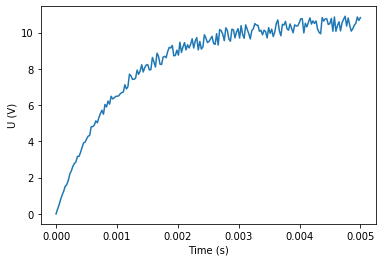

In [5]:
import matplotlib.pyplot as plt 
import numpy as np
import pathlib as pl 

data = np.loadtxt(str(pl.Path(".") / "data" / "exp_data_rc.dat"))

plt.plot( data[:,0], data[:,1])
plt.xlabel("Time (s)")
plt.ylabel("U (V)")
plt.show()


Ces données sont obtenues avec la configuration suivante : 

$$ u_e = 10\,V\, ; \, C=10^{-6}\,F\, ; \, R=?? $$

**Question 1 :**
Formuler le problème d'optimisation à résoudre pour identifier le paramètre R ? 

**Question 2 :** 
A l'aide de `scipy.optimize` identifier la valeur du paramètre R. 

**Question 3 :** 
Représenter sur un même graphique la donnée expérimentale et le résultat du modèle pour la valeur de $R$ identifiée. 

R = [878.20678403]


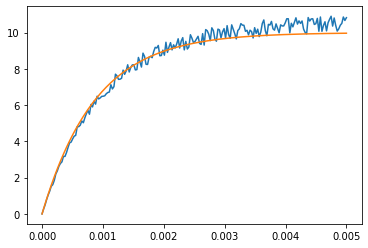

In [6]:
#### Correction en trichant, i.e. en connaissant la forme de la solution analytique 
def sol_analytique(times, R):
    C = 1.e-6
    u = 10. * ( 1. - np.exp( - times / (R* C)))
    return u 

data = np.loadtxt(pl.Path(".") / "data" / "exp_data_rc.dat")

times = data[:,0]
u_exp = data[:,1]
p_opt, _ = scipy.optimize.curve_fit( sol_analytique, times, u_exp, p0=100.)

plt.plot(times, u_exp)
plt.plot(times, sol_analytique(times, p_opt[0]))

print(f"R = {p_opt}")



R = [878.20669144]


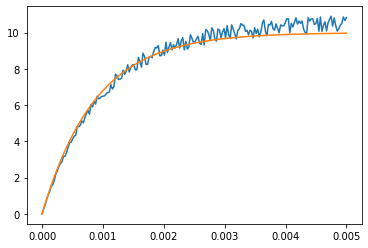

In [7]:
### Correction sans tricher, i.e. sans pré-supposer la forme de la solution analytique mais en utilisant odeint

def du_dt(X, t, r, c, ue):
    u = X[0]
    return (ue - u)/(r*c)


def model(times, R):
    C = 1.e-6
    u_init = np.array([0.])

    u = scipy.integrate.odeint(du_dt,u_init, times, args=(R, 1.e-6, 10.))
    return u.reshape((-1,))

data = np.loadtxt(pl.Path(".") / "data" / "exp_data_rc.dat")

times = data[:,0]
u_exp = data[:,1]
p_opt, _ = scipy.optimize.curve_fit( model, times, u_exp, p0=100.)

plt.plot(times, u_exp)
plt.plot(times, model(times, p_opt[0]))

print(f"R = {p_opt}")
